In [1]:
%matplotlib inline
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import api_key

In [2]:
titles = []
release_dates = []
overview = []

for x in range(6):
    url = "https://api.themoviedb.org/3/discover/tv?&api_key="+api_key+"&page="+str(x+1)+"&with_keywords=9738|9951&without_genres=16,35"
    response = requests.get(url)
    data = response.json() 
    for y in range(len(data["results"])):
        titles.append(data["results"][y]["name"])
        release_dates.append(data["results"][y]["first_air_date"])
        overview.append(data["results"][y]["overview"])


In [21]:
#print(len(titles))

In [4]:
for x in range(32):
    url = "https://api.themoviedb.org/3/discover/movie?&sort_by=revenue.desc&api_key="+api_key+"&page="+str(x+1)+"&with_keywords=9738|9951"
    response = requests.get(url)
    data = response.json() 
    for y in range(len(data["results"])):
        titles.append(data["results"][y]["title"])
        release_dates.append(data["results"][y]["release_date"])
        overview.append(data["results"][y]["overview"])

In [22]:
#print(len(titles))

In [6]:
years = []
months = []
for x in range(len(release_dates)):
    try:
        y = release_dates[x]
        year = y.split("-")[0]
        month = y.split("-")[1]
        years.append(year)
        months.append(month)
    except:
        years.append("")
        months.append("")

In [29]:
movie_data = {
    "Titles":titles,
    "Year":years,
    "Month": months,
    "Overview":overview
}

movie_df = pd.DataFrame(data=movie_data)
movie_df.head(8)

,Month,Overview,Titles,Year
0,03,The Doctor looks and seems human. He's handsom...,Doctor Who,2005
1,09,The exploits of FBI Special Agents Fox Mulder ...,The X-Files,1993
2,11,The adventures of a Time Lord—a time-travellin...,Doctor Who,1963
3,09,Star Trek: The Next Generation is an American ...,Star Trek: The Next Generation,1987
4,09,Space. The Final Frontier. The U.S.S. Enterpri...,Star Trek,1966
5,10,Smallville is an American television series de...,Smallville,2001
6,07,The story of Stargate SG-1 begins about a year...,Stargate SG-1,1997
7,09,"Ten years before Kirk, Spock, and the Enterpri...",Star Trek: Discovery,2017


In [30]:
movie_df.to_csv("ufo_movies_tv.csv")

In [8]:
year_df = movie_df.groupby(movie_df["Year"],as_index=False)
year_df = year_df["Titles"].count()
year_df = year_df[year_df.Year != ""]
year_df["Year"] = year_df["Year"].astype(int)

In [9]:
bins = [0,1959,1969,1979,1989,1999,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
bin_labels = ["before 1959","1960s","1970s","1980s","1990s","early 2000s","'07","'08","'09","'10","'11","'12","'13","'14","'15","'16","'17","'18"]
#print(len(bins))
#print(len(bin_labels))

In [31]:
year_df["Decade"] = pd.cut(year_df["Year"],bins,labels=bin_labels)
movies_by_year = year_df.groupby(year_df["Decade"],as_index=False).sum()
movies_by_year.tail()

,Decade,Year,Titles
13,'14,2014,22
14,'15,2015,38
15,'16,2016,24
16,'17,2017,26
17,'18,2018,3


In [32]:
decades = list(movies_by_year["Decade"])
counts = list(movies_by_year["Titles"])
#print(len(decades))

In [33]:
labels = decades
sizes = counts
#print(len(labels))
#print(len(sizes))

Text(1.5,0.95,'Note:\n2007-2016 correspond with the 10 years of highest UFO sightings.')

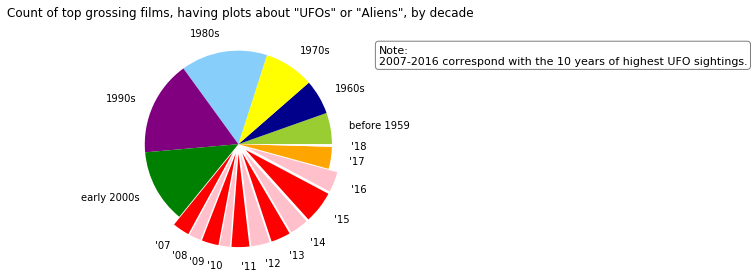

In [36]:
# The colors of each section of the pie chart
colors = ["yellowgreen", "darkblue", "yellow", "lightskyblue","purple","green","red","pink","red","pink","red","pink","red","pink","red","pink","orange","white","white"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,labeldistance=1.2,explode = explode)
plt.axis('equal')
plt.title("Count of top grossing films, having plots about \"UFOs\" or \"Aliens\", by decade",y=1.08)
textstr = ("Note:\n2007-2016 correspond with the 10 years of highest UFO sightings.")
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(1.5, 0.95, textstr, fontsize=11,verticalalignment='center', bbox=props)

In [15]:
recent_counts = counts[6:16]
recent_years = decades[6:16]

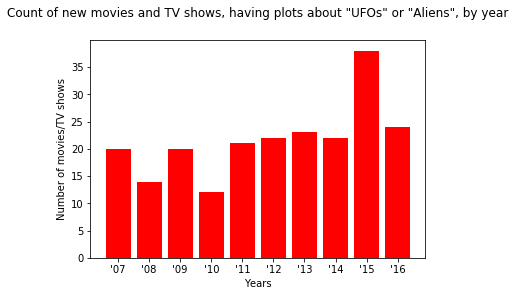

In [38]:
plt.bar(recent_years,recent_counts,align="center",color='r')
plt.title("Count of new movies and TV shows, having plots about \"UFOs\" or \"Aliens\", by year",y = 1.08)
plt.xlabel("Years")
plt.ylabel("Number of movies/TV shows")
plt.show()

<BarContainer object of 10 artists>

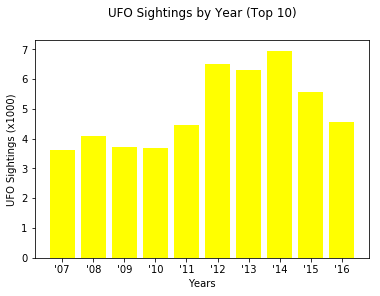

In [17]:
ufo_sightings = [3.605,4.100,3.709,3.694,4.457,6.503,6.317,6.954,5.565,4.552]
plt.title("UFO Sightings by Year (Top 10)",y = 1.08)
plt.xlabel("Years")
plt.ylabel("UFO Sightings (x1000)")
plt.bar(recent_years,ufo_sightings,color="yellow",align="center")